In [37]:
#import library
import numpy as np
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import tecplot_io as tec
import os

#Declare working directory
os.chdir('d:\post\Project\Fixed_Turbine')

#Declare some variable
dt = 0.68543297937 
nturbinex = 4
nturbiney = 4
nturbine = 16
#Diameter of turbine
D = 80
#Other variable
Sx = 7
Sy = 7
#Power density
Power_density = []
#Time variable
time = []
#Mean infinite velocity
U = 11.5258407161
#frequency of wave
omega = 0.0498561155567
#wave period
T = 2*np.pi/omega
#Rotational angular period
T_turb = 42.84

#turbine hub height
H_hub = 70.0
nvar = 6

#Clean data
fid = open('log.uref','r')
content=fid.readlines()
# Turbine_           1 :angvel=   50.735637598099999      , TSR=   4.4059452767309510      , Uref=  0.86364504796591524
196034763     

nline = len(content)
nt = nline / nturbine
data=np.zeros((nline,4))

for i in range(int(nt)):
  for j in range(nturbine):
    i2 = nturbine * i + j
    value=content[i2].split()
    #print(value)
    data[i2,0]=(i+1)*dt
    data[i2,1]=value[3] # angvel
    data[i2,2]=value[6] # TSR
    data[i2,3]=value[9] # Uref
fid.close()
np.savetxt('uref.dat', data)

In [38]:
fid = open('log.cthrust','r')
content=fid.readlines()
# Thrust=  0.10233803188671066      , Torque=   6.1668522808625047E-003 , C_Thrust=  0.38109671967396186      , Power=   6.3533464098887757E-002 , C_Power=  0.12840488196034763     

nline = len(content)
nt = nline / nturbine
data=np.zeros((int(nturbine*nt),6))

for i in range(int(nt)):
  for j in range(nturbine):
    i2 = nturbine * i + j
    value=content[i2].split()
    #print(value)
    data[i2,0]=(i+1)*dt
    data[i2,1]=value[1] # thrust
    data[i2,2]=value[4] # torque
    data[i2,3]=value[7] # c_thrust
    data[i2,4]=value[10] # power
    data[i2,5]=float(value[13])*1.0 # c_power
fid.close()

np.savetxt('coeff.dat', data)

In [39]:
#Extracted individual wind turbine power
def power(i):
    t = []
    for j in range (i, int(len(x)), 16):
            t.append(y[j])
    return t

#-------------------------------#
#Extracted power density
def powerdensity(i):
    powerdensity = []
    for j in range (i, int(len(x)), 16):
            powerdensity.append(y[j]/(Sx*Sy*D))
    return powerdensity

In [40]:
#Data Frame
#data = tec.tecplot_reader('coeff.dat', [nt, nturbine, nvar], 0)
#data = data.reshape([ nt, nturbine, nvar]) 
data = pd.read_csv('coeff.dat', sep = '\s+', header = None)
data = pd.DataFrame(data)
x = data[0] #time variable
y = data[4] #Turbine power
#rearrange series to array multidimensional
t = np.array(y)
t = t.reshape([int(nt), nturbine])
f1 = open( "test.txt",'w')
f1.write("VARIABLES = u_rms/U_hub, z/D  \n")
np.savetxt(f1, y , fmt='%1.8e', delimiter='\t')
f1.close()
#Normalized time variable
for i in range(0, int(len(x)), 16):
    #time.append(x[i]*(U/H_hub)) #Using U/H_hub
    time.append(x[i]/T_turb)           #Using T_turb

In [41]:
power_density_v2 = t/(Sx*Sy*D)
power_density_average_v2 = np.mean(power_density_v2, axis = 1)

In [42]:
#Tính tay đầy thô kệch
powerdensity_1 = powerdensity(0)
powerdensity_2 = powerdensity(1)
powerdensity_3 = powerdensity(2)
powerdensity_4 = powerdensity(3)
powerdensity_5 = powerdensity(4)
powerdensity_6 = powerdensity(5)
powerdensity_7 = powerdensity(6)
powerdensity_8 = powerdensity(7)
powerdensity_9 = powerdensity(8)
powerdensity_10 = powerdensity(9)
powerdensity_11 = powerdensity(10)
powerdensity_12 = powerdensity(11)
powerdensity_13 = powerdensity(12)
powerdensity_14 = powerdensity(13)
powerdensity_15 = powerdensity(14)
powerdensity_16 = powerdensity(15)




In [43]:
# create a class for turbine where store the power density and power and serial number of each turbine
class Turbine:
    def __init__(self, i = 0):
        self.i = i
        self.powerdensity = powerdensity(i)
        self.power = power(i)
    def __repr__(self):
        return 'Turbine %d' % self.i
    def __str__(self):
        return 'Turbine %d' % self.i 


In [44]:
Turbine_1 = Turbine(0)
Turbine_2 = Turbine(1)
Turbine_3 = Turbine(2)
Turbine_4 = Turbine(3)
Turbine_5 = Turbine(4)
Turbine_6 = Turbine(5)
Turbine_7 = Turbine(6)
Turbine_8 = Turbine(7)
Turbine_9 = Turbine(8)
Turbine_10 = Turbine(9)
Turbine_11 = Turbine(10)
Turbine_12 = Turbine(11)
Turbine_13 = Turbine(12)
Turbine_14 = Turbine(13)
Turbine_15 = Turbine(14)
Turbine_16 = Turbine(15)


In [45]:
#Extracted power density average
powerdensity_average = []
for i in range (int(len(time))):
    powerdensity_average.append((powerdensity_1[i]+ powerdensity_2[i]+powerdensity_3[i]+powerdensity_4[i]+powerdensity_5[i]+powerdensity_6[i]+powerdensity_7[i]+powerdensity_8[i]+powerdensity_9[i]+powerdensity_10[i]+powerdensity_11[i]+powerdensity_12[i]+powerdensity_13[i]+powerdensity_14[i]+powerdensity_15[i]+powerdensity_16[i])/16)
    

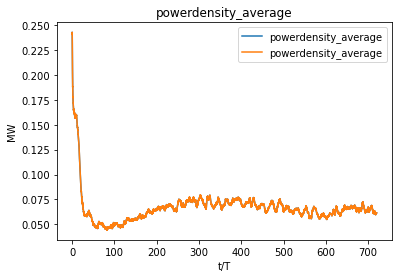

In [46]:
#Plot before nomarlizing
plt.plot(time, powerdensity_average, time, power_density_average_v2, label='powerdensity_average')
plt.legend(['v1','v2'])
plt.xlabel('t/T')
plt.ylabel('MW')
plt.title('powerdensity_average')
plt.legend()
plt.show()

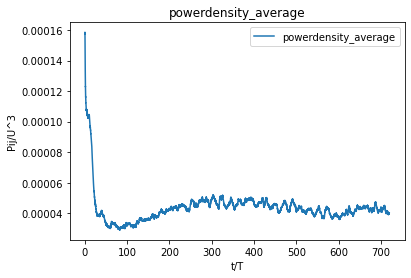

In [47]:
#Nomorlized powerdensity_average
powerdensity_average_1 = []
for i in range(int(len(time))):
    powerdensity_average_1.append(powerdensity_average[i]/(U**3))

#vẽ đồ thị
plt.plot(time, powerdensity_average_1, label='powerdensity_average')
plt.xlabel('t/T')
plt.ylabel('Pij/U^3')
plt.title('powerdensity_average')
plt.legend()
plt.show()


 

In [48]:
#change working directory
path = 'd:\post\Project\Pitch_Turbine'
os.chdir(path)
#-----------------------------------------------------#
#Clean data
fid = open('log.uref','r')
content=fid.readlines()
# Turbine_           1 :angvel=   50.735637598099999      , TSR=   4.4059452767309510      , Uref=  0.86364504796591524
196034763     

nline = len(content)
nt = nline / nturbine
data=np.zeros((nline,4))

for i in range(int(nt)):
  for j in range(nturbine):
    i2 = nturbine * i + j
    value=content[i2].split()
    #print(value)
    data[i2,0]=(i+1)*dt
    data[i2,1]=value[3] # angvel
    data[i2,2]=value[6] # TSR
    data[i2,3]=value[9] # Uref
fid.close()
np.savetxt('uref.dat', data)

#-----------------------------------------------------#

fid = open('log.cthrust','r')
content=fid.readlines()
# Thrust=  0.10233803188671066      , Torque=   6.1668522808625047E-003 , C_Thrust=  0.38109671967396186      , Power=   6.3533464098887757E-002 , C_Power=  0.12840488196034763     

nline = len(content)
print(nline)
nt = nline / nturbine
data=np.zeros((int(nturbine*nt),6))

for i in range(int(nt)):
  for j in range(nturbine):
    i2 = nturbine * i + j
    value=content[i2].split()
    #print(value)
    data[i2,0]=(i+1)*dt
    data[i2,1]=value[1] # thrust
    data[i2,2]=value[4] # torque
    data[i2,3]=value[7] # c_thrust
    data[i2,4]=value[10] # power
    data[i2,5]=float(value[13])*1.0 # c_power
fid.close()

np.savetxt('coeff.dat', data)

720000


In [49]:
#Data Frame for Pitching motion
data = pd.read_csv('coeff.dat', sep = '\s+', header = None)
data = pd.DataFrame(data)
y = data[4] #Turbine power

#--------------------------------#
#Tính tay đầy thô kệch
power_1 = powerdensity(0)
power_2 = powerdensity(1)
power_3 = powerdensity(2)
power_4 = powerdensity(3)
power_5 = powerdensity(4)
power_6 = powerdensity(5)
power_7 = powerdensity(6)
power_8 = powerdensity(7)
power_9 = powerdensity(8)
power_10 = powerdensity(9)
power_11 = powerdensity(10)
power_12 = powerdensity(11)
power_13 = powerdensity(12)
power_14 = powerdensity(13)
power_15 = powerdensity(14)
power_16 = powerdensity(15)

#power density average
power_average = []
for i in range (int(len(time))):
    power_average.append((power_1[i]+ power_2[i]+power_3[i]+power_4[i]+power_5[i]+power_6[i]+power_7[i]+power_8[i]+power_9[i]+power_10[i]+power_11[i]+power_12[i]+power_13[i]+power_14[i]+power_15[i]+power_16[i])/16)

#Normalized power density average
powerdensity_average_pitchingmotion = []
for i in range(int(len(time))):
    powerdensity_average_pitchingmotion.append(power_average[i]/(U**3))

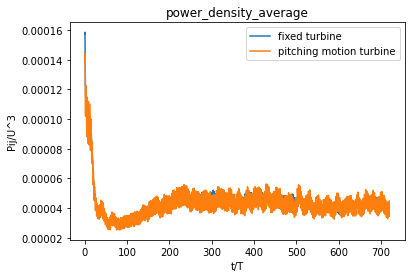

In [50]:
#plot
plt.plot(time, powerdensity_average_1,time, powerdensity_average_pitchingmotion, label='powerdensity_average')
plt.legend(['fixed turbine','pitching motion turbine'])
plt.xlabel('t/T')
plt.ylabel('Pij/U^3')
plt.title('power_density_average')
plt.show()

In [59]:
omega = 4.9856115556811860E-002
amp = 1.4854461355217998
theta = omega*np.abs(time)
wave = amp * np.sin(theta)
#print(time)

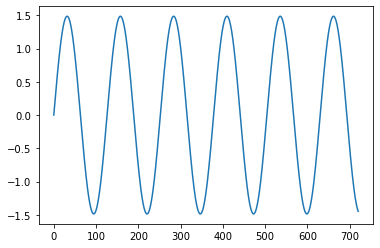

In [57]:
plt. plot(time, wave, label='wave')
plt. show()

In [ ]:
# create a class for turbine where store the power density and power and serial number of each turbine
class Turbine:
    def __init__(self, i = 0):
        self.i = i
        self.powerdensity = powerdensity(i)
        self.power = power(i)
    def __repr__(self):
        return 'Turbine %d' % self.i
    def __str__(self):
        return 'Turbine %d' % self.i  

In [ ]:
#change working directory
path = 'd:\post\Project\SWAY_Turbine'
os.chdir(path)
#-----------------------------------------------------#
#Clean data
fid = open('log.uref','r')
content=fid.readlines()
# Turbine_           1 :angvel=   50.735637598099999      , TSR=   4.4059452767309510      , Uref=  0.86364504796591524
196034763     

nline = len(content)
nt = nline / nturbine
data=np.zeros((nline,4))

for i in range(int(nt)):
  for j in range(nturbine):
    i2 = nturbine * i + j
    value=content[i2].split()
    #print(value)
    data[i2,0]=(i+1)*dt
    data[i2,1]=value[3] # angvel
    data[i2,2]=value[6] # TSR
    data[i2,3]=value[9] # Uref
fid.close()
np.savetxt('uref.dat', data)

#-----------------------------------------------------#

fid = open('log.cthrust','r')
content=fid.readlines()
# Thrust=  0.10233803188671066      , Torque=   6.1668522808625047E-003 , C_Thrust=  0.38109671967396186      , Power=   6.3533464098887757E-002 , C_Power=  0.12840488196034763     

nline = len(content)
print(nline)
nt = nline / nturbine
data=np.zeros((int(nturbine*nt),6))

for i in range(int(nt)):
  for j in range(nturbine):
    i2 = nturbine * i + j
    value=content[i2].split()
    #print(value)
    data[i2,0]=(i+1)*dt
    data[i2,1]=value[1] # thrust
    data[i2,2]=value[4] # torque
    data[i2,3]=value[7] # c_thrust
    data[i2,4]=value[10] # power
    data[i2,5]=float(value[13])*1.0 # c_power
fid.close()

np.savetxt('coeff.dat', data)

240000


In [ ]:
#Data frame for SWAY
data = pd.read_csv('coeff.dat', sep = '\s+', header = None)
data = pd.DataFrame(data)
y = data[4] #Turbine power


In [ ]:
turbine_SWAY_1 = Turbine(0)
turbine_SWAY_2 = Turbine(1)
turbine_SWAY_3 = Turbine(2)
turbine_SWAY_4 = Turbine(3)
turbine_SWAY_5 = Turbine(4)
turbine_SWAY_6 = Turbine(5)
turbine_SWAY_7 = Turbine(6)
turbine_SWAY_8 = Turbine(7)
turbine_SWAY_9 = Turbine(8)
turbine_SWAY_10 = Turbine(9)
turbine_SWAY_11 = Turbine(10)
turbine_SWAY_12 = Turbine(11)
turbine_SWAY_13 = Turbine(12)
turbine_SWAY_14 = Turbine(13)
turbine_SWAY_15 = Turbine(14)
turbine_SWAY_16 = Turbine(15)

KeyError: 240000

In [ ]:
#power density average for turbine_SWAY
powerdensityaverage_SWAY_1 = []
for i in range (int(len(time))):
    powerdensityaverage_SWAY_1.append((turbine_SWAY_1.powerdensity[i]+\
    turbine_SWAY_2.powerdensity[i]+turbine_SWAY_3.powerdensity[i]+\
    turbine_SWAY_4.powerdensity[i]+turbine_SWAY_5.powerdensity[i]+\
    turbine_SWAY_6.powerdensity[i]+turbine_SWAY_7.powerdensity[i]+\
    turbine_SWAY_8.powerdensity[i]+turbine_SWAY_9.powerdensity[i]+\
    turbine_SWAY_10.powerdensity[i]+turbine_SWAY_11.powerdensity[i]+\
    turbine_SWAY_12.powerdensity[i]+turbine_SWAY_13.powerdensity[i]+\
    turbine_SWAY_14.powerdensity[i]+turbine_SWAY_15.powerdensity[i]+\
    turbine_SWAY_16.powerdensity[i])/16)

#Normalized power density average for turbine_SWAY
powerdensityaverage_SWAY_2 = []
for i in range(int(len(time))):
    powerdensityaverage_SWAY_2.append(powerdensityaverage_SWAY_1[i]/(U**3))
    

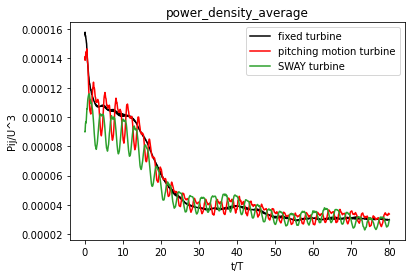

In [ ]:
#Plot multiple figure
plt.plot(time, powerdensity_average_1, time, powerdensity_average_pitchingmotion\
        , time, powerdensityaverage_SWAY_2, label='powerdensity_average')
plt.gca().get_lines()[0].set_color("black")
plt.gca().get_lines()[1].set_color("red")
plt.legend(['fixed turbine','pitching motion turbine','SWAY turbine'])
plt.xlabel('t/T')
plt.ylabel('Pij/U^3')
plt.title('power_density_average')
plt.show()


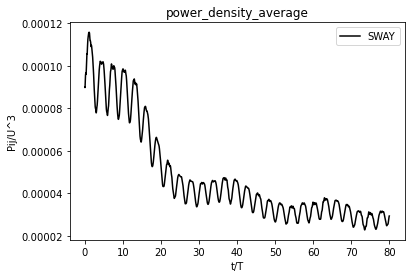

In [ ]:
#Plot multiple figure
plt.plot(time, powerdensityaverage_SWAY_2, label='powerdensity_average')
plt.gca().get_lines()[0].set_color("black")
plt.legend(['SWAY'])
plt.xlabel('t/T')
plt.ylabel('Pij/U^3')
plt.title('power_density_average')
plt.show()